In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.decomposition import PCA
from MIL_functions import data_encoding

In [2]:
pca = PCA(n_components=2)

data = data_encoding.load_compressed_pickle('data\encoded\encoded_data.dat')
X1 = data['MACCS'].to_list()
data = data_encoding.load_compressed_pickle('data\encoded\encoded_data_hansen.dat')
X2 = data['MACCS'].to_list()

pca.fit(X1+X2)
Xt1 = pca.transform(X1)
Xt2 = pca.transform(X2)

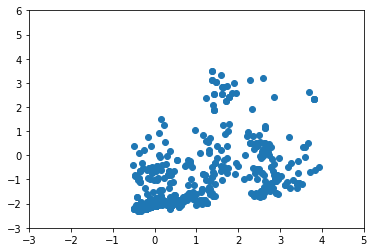

In [3]:
plot = plt.scatter(Xt1[:,0],Xt1[:,1])
plt.xlim([-3,5])
plt.ylim([-3,6])
plt.show()

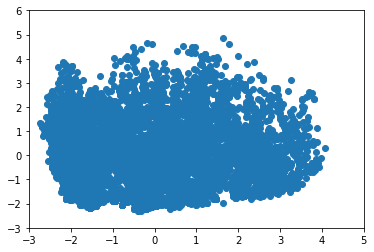

In [4]:
plot = plt.scatter(Xt2[:,0],Xt2[:,1])
plt.xlim([-3,5])
plt.ylim([-3,6])
plt.show()

In [29]:
def range_finder(x1,y1,x2,y2):
    deltaX = (max(x1) - min(x1))/5
    deltaY = (max(y1) - min(y1))/5
    xmin1 = min(x1) - deltaX
    xmax1 = max(x1) + deltaX
    ymin1 = min(y1) - deltaY
    ymax1 = max(y1) + deltaY

    deltaX = (max(x2) - min(x2))/5
    deltaY = (max(y2) - min(y2))/5
    xmin2 = min(x2) - deltaX
    xmax2 = max(x2) + deltaX
    ymin2 = min(y2) - deltaY
    ymax2 = max(y2) + deltaY
    return [min([xmin2,xmin1]),max([xmax1,xmax2])],[min([ymin2,ymin1]),max([ymax1,ymax2])]

def density_map_data(x,y,x_range,y_range):
    xmin,xmax = x_range
    ymin,ymax = y_range
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx,yy,f

## note, sizes given in cm, will be converted to inches for usage in matplotlib
def density_PCA(Xt,name,size,font):
    def cm_in(num):
        return num/2.54
    figure_size = tuple(cm_in(i) for i in size)
    print(figure_size)
    fig, ax = plt.subplots(figsize=figure_size)
    # fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(1, 1, 1, figsize = figure_size)
    x,y,z = density_map_data(Xt[:,0],Xt[:,1],x_range,y_range)
    ax.contour(x,y,z,cmap='plasma')
    if name:
        ax.set_title(name+' (n='+str(len(Xt[:,0]))+')')
    ax.set_xlabel('PC1',fontsize=10)
    ax.set_ylabel('PC2',fontsize=10)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    return fig

(1.968503937007874, 1.968503937007874)


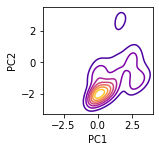

In [39]:
#Aromatic amines
# x_range,y_range = range_finder(Xt1[:,0],Xt1[:,1],Xt2[:,0],Xt2[:,1])
x_range = [-4,4];y_range=[-3.25,3.5]
fig = density_PCA(Xt = Xt1, name = '',size=(5,5),font=1)

(1.968503937007874, 1.968503937007874)


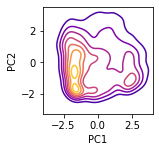

In [40]:
fig = density_PCA(Xt = Xt2, name = '',size=(5,5),font=1)

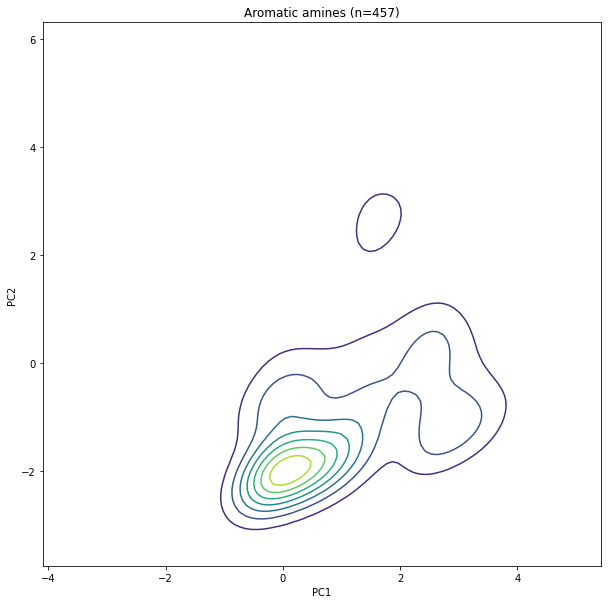

In [ ]:
fig = density_PCA(Xt = Xt1, name = 'Aromatic amines')

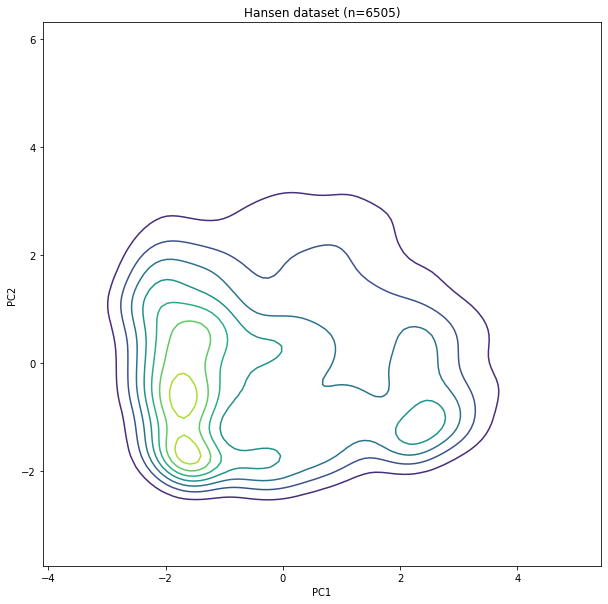

In [ ]:
fig = density_PCA(Xt = Xt2, name = 'Hansen dataset')